# Performance Metrics

They help evaluate the performace of ML algorithms, both classification as well as regression algorithms

There are different perfomance metrics for classification and regression problems

## 1. Performance metrics for classification


Some of the performance metrics evaluation for classification are:- 

- Accuracy
- Confusion Matrix
- Precision
- Recall
- F-Score
- AUC (Area Under the Curve)-ROC

### 1. Accuracy

It can be determined as the number of correct predictions to the total number of predictions

![accuracy](accuracy.png)



In [1]:
from sklearn.metrics import accuracy_score

#### When to use accuracy

When the target variable classes in the data are appproximately balanced


#### When not use accuracy

When the target variable majorly belongs to one class


### 2. Confusion Matrix

It's a tabular representation of prediction outcomes of any any binary classifier

The matrix compares the actual target values with those predicted by the ML model

The table has two dimensions, `Actual` and `Predicted`

Both dimensions have `True Positives (TP)`, `False Positives (FP)`, `False Negatives (FN)` and `True Negatives (TN)`

For binary classification the matrix will be a 2x2 table, for multi-class the matrix shape will be equal to the number of classes

![example confusion matrix](confusion_matrix.png)



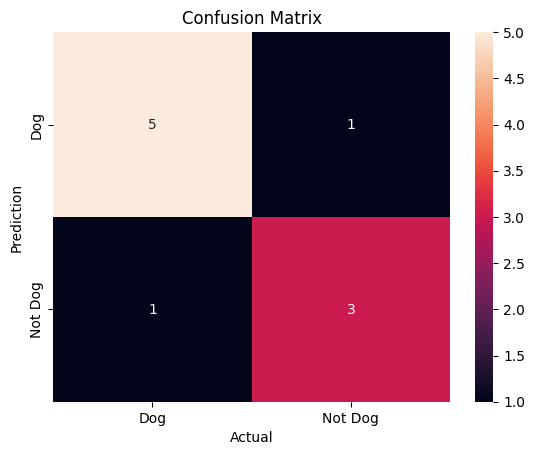

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


actual = np.array(
    ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
    ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])

# confusion_matrix
conf_matrix = confusion_matrix(actual, predicted)

sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['Dog', 'Not Dog'], yticklabels=['Dog', 'Not Dog'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the confusion matrix we can find:

- ***Accuracy:*** It uses the ratio of total correct instances to the total instances

![accuracy confusion_matrix](acc1.png)

acc = (5+3)/(5+3+1+1) = 8/10 = 0.8

- ***Precision:*** It's a measure of how accurate a model's positive predictions are
>It's defined as the ratio of true positive predictions to the total number of positive predictions made by the model

![precision](precision.png)

precison = 5 / (5 + 1) = 5/6 = 0.8333

- ***Recall:*** It measures the effectiveness of a classification model in identifying all relevant instances from a dataset
>It's the ration of the number of true positives(TP) to the sum of true positives(TP) and false positives(FP)

![recall](recall.png)

recall = 5 / (5 + 1) = 5/6 = 0.8333

- ***F1-Score:*** It's used to evaluate the overall performance of a classification mode;l
>It's the harmonic mean of precision and recall

![f1-score](f1_score.png)

F1-Score = (2 * 0.8333 * 0.8333) / (0.8333 + 0.8333) = 0.8333


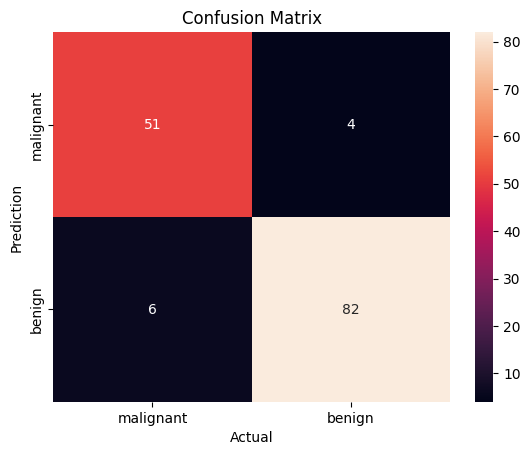

Accuracy:  0.9300699300699301
Precision:  0.9534883720930233
Recall:  0.9318181818181818
F1_score:  0.942528735632184


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# loading the dataset
x, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# training
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

# prediction
y_pred = tree.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)
F1_score = f1_score(y_test, y_pred)
print("F1_score: ", F1_score)

## 2.Performance Metrics for Regression Problems

### a. Mean Absolute Error (MAE)

It measures the average absolute difference between actual and predicted values, absolute meaning taking a number as positive

![mean absolute error](mae.png)

where:-
- Y, the actual outcome
- Y', the prdicted outcome
- N, the total number of data points



#### Limitations of M.A.E

it's not differentiable, thus we have to use optimizers such as Gradient Descent

In [5]:
actual = [2, 3, 5, 5, 9]
calculated = [3, 3, 8, 7, 6]

n = 5
sum = 0

for i in range(n):
    sum += abs(actual[i] - calculated[i])

error = sum/n

print("Mean Absolute Error: ", error)

Mean Absolute Error:  1.8


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# loading the dataset
x, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# training
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

# prediction
y_pred = tree.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.0979020979020979


### b. Mean Squared Error (MSE)

It's also known as ***Mean Squared Deviation***

It measures the average of the squared difference between predicted values and the actual values given by the model

Due to squared difference it penalizes small error, this leads to over estimation of how bad the model really is

![mean squared error](mse.png)

where:- 
- y, actual value
- y', the predicted value
- n, the total number of data points

<code>
from sklearn.metrics import mean_squared_error
</code>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# loading the dataset
x, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# training
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

# prediction
y_pred = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.055944055944055944
